In [10]:
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import adfuller

In [11]:
# Based on the AR formula to generate a AR progress
def generate_ar_process(lags, coefs, length):
    
    #cast coefs to np array
    coefs = np.array(coefs)
    
    #initial values
    series = [np.random.normal() for _ in range(lags)]
    
    for _ in range(length):
        #get previous values of the series, reversed
        prev_vals = series[-lags:][::-1]
        
        #get new value of time series
        new_val = np.sum(np.array(prev_vals) * coefs) + np.random.normal()
        
        series.append(new_val)
        
    return np.array(series)

In [12]:
def perform_adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])

# AR(1) Process

## Stationary

Text(0.5, 1.0, 'Stationary AR(1) Process')

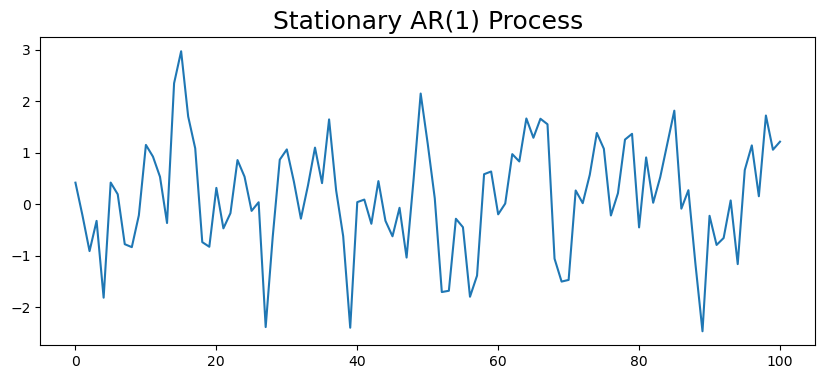

In [13]:
ar_1_process = generate_ar_process(1, [.5], 100)
plt.figure(figsize=(10,4))
plt.plot(ar_1_process)
plt.title('Stationary AR(1) Process', fontsize=18)

In [5]:
perform_adf_test(ar_1_process) # check if it is stationary

ADF Statistic: -5.612850
p-value: 0.000001


## Non-Stationary

Text(0.5, 1.0, 'Non-Stationary AR(1) Process')

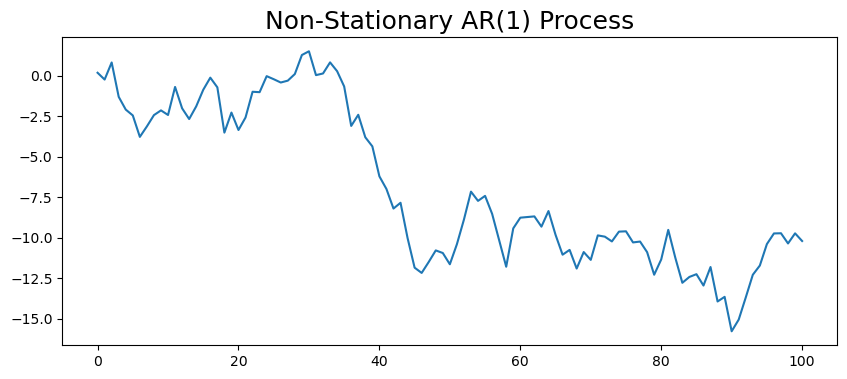

In [14]:
ar_1_process_unit_root = generate_ar_process(1, [1], 100) # random walk Y(t)= Y(t-1) + c
plt.figure(figsize=(10,4))
plt.plot(ar_1_process_unit_root)
plt.title('Non-Stationary AR(1) Process', fontsize=18)

In [15]:
perform_adf_test(ar_1_process_unit_root) # check if it is stationary

ADF Statistic: -1.506408
p-value: 0.530339


# AR(2) Process

## Stationary

Text(0.5, 1.0, 'Stationary AR(2) Process')

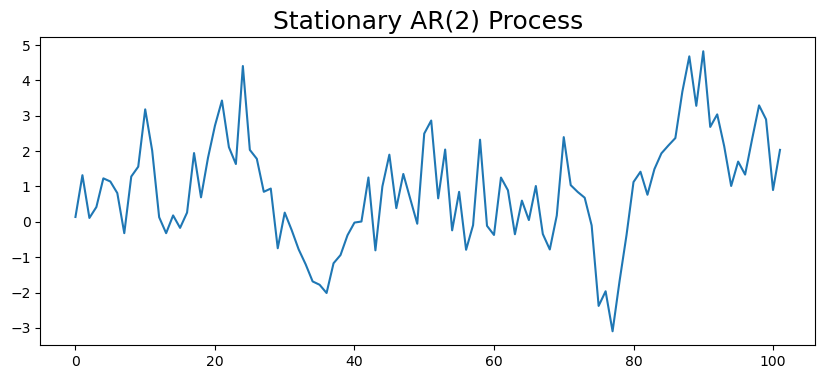

In [16]:
ar_2_process = generate_ar_process(2, [.5, .3], 100)
plt.figure(figsize=(10,4))
plt.plot(ar_2_process)
plt.title('Stationary AR(2) Process', fontsize=18)

In [17]:
perform_adf_test(ar_2_process)

ADF Statistic: -3.184623
p-value: 0.020892


## Non-Stationary

Text(0.5, 1.0, 'Non-Stationary AR(2) Process')

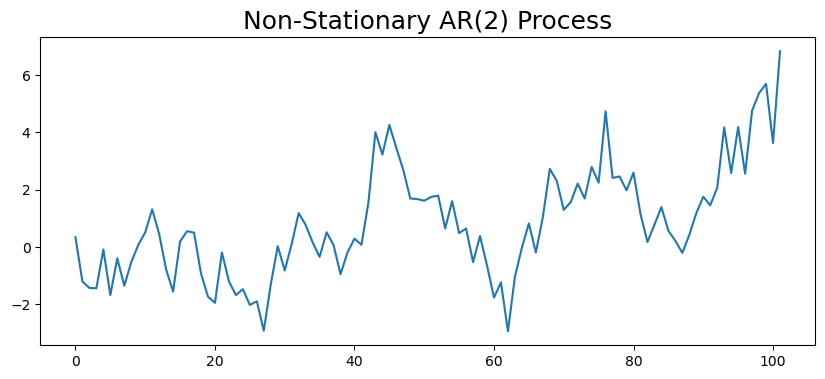

In [18]:
ar_2_process_unit_root = generate_ar_process(2, [.7, .3], 100) # the sum of the coefs is equal to 1
plt.figure(figsize=(10,4))
plt.plot(ar_2_process_unit_root)
plt.title('Non-Stationary AR(2) Process', fontsize=18)

In [19]:
perform_adf_test(ar_2_process_unit_root)

ADF Statistic: -1.447745
p-value: 0.559185


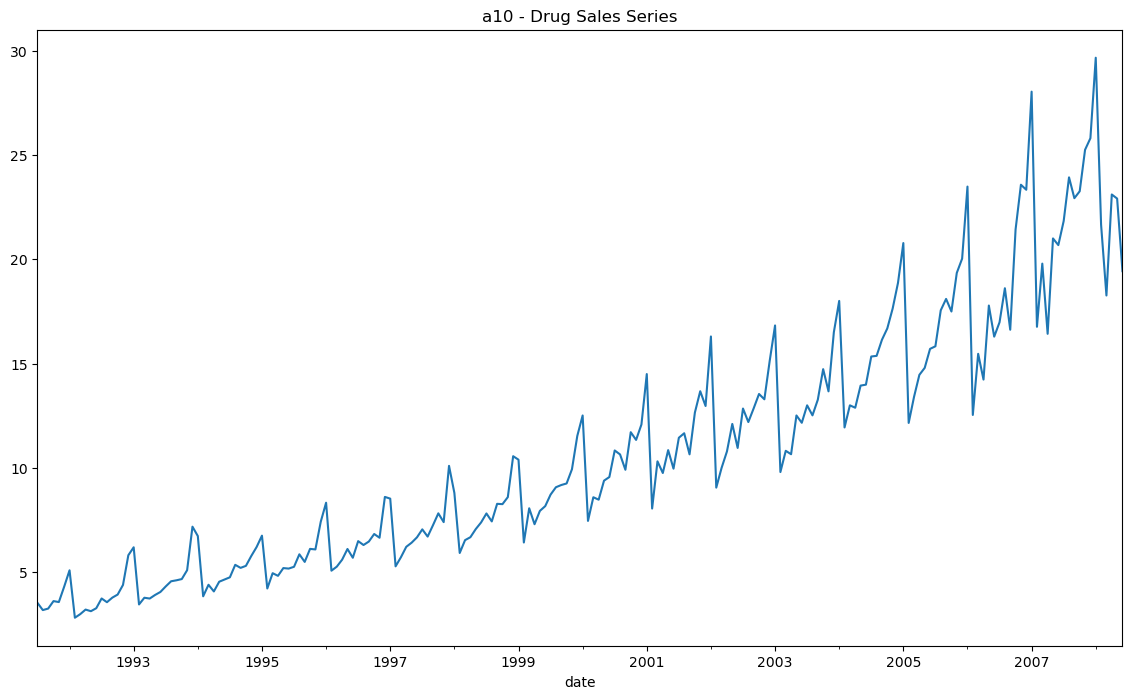

In [20]:
# Setup and Import data
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import numpy as np
%matplotlib inline

url = 'https://raw.githubusercontent.com/selva86/datasets/master/a10.csv'
df = pd.read_csv(url, parse_dates=['date'], index_col='date')
series = df.loc[:, 'value'].values
df.plot(figsize=(14,8), legend=None, title='a10 - Drug Sales Series');

In [21]:
# ADF Test
result = adfuller(series, autolag='AIC')
print(result)
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[2]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

(3.1451856893067487, 1.0, 15, 188, {'1%': -3.465620397124192, '5%': -2.8770397560752436, '10%': -2.5750324547306476}, 549.6705685364172)
ADF Statistic: 3.1451856893067487
n_lags: 15
p-value: 1.0
Critial Values:
   1%, -3.465620397124192
Critial Values:
   5%, -2.8770397560752436
Critial Values:
   10%, -2.5750324547306476


In [7]:
# ADF test on random numbers
series = np.random.randn(100)
result = adfuller(series, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -8.844096467378531
p-value: 1.6384311982224807e-14
Critial Values:
   1%, -3.4989097606014496
Critial Values:
   5%, -2.891516256916761
Critial Values:
   10%, -2.5827604414827157


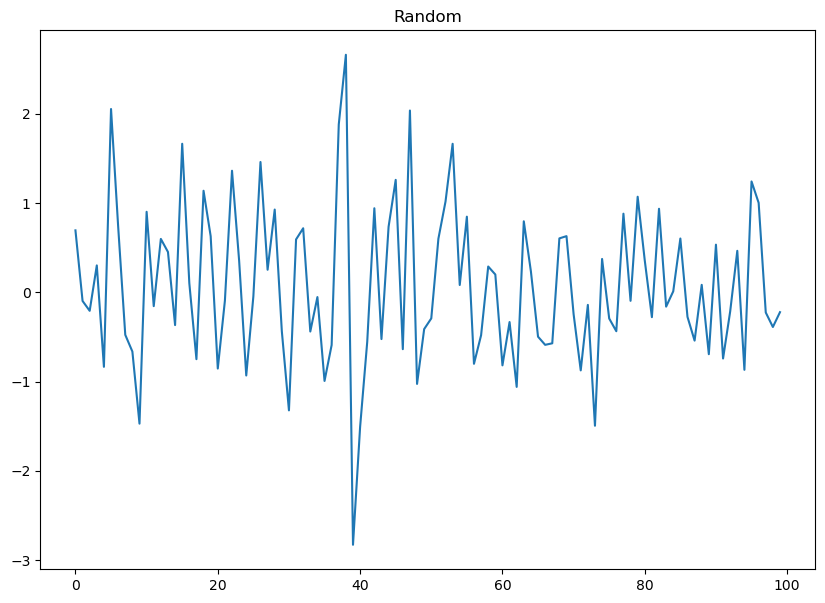

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, axes = plt.subplots(figsize=(10,7))
plt.plot(series);
plt.title('Random');